In [1]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
class MyLinearRegression:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        
    def fit(self, X, y):
        
        n = X.shape[0]
        
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))
        else:
            X_train = X
        
        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y
        
        return
    
    def predict(self, X):
        
        n = X.shape[0]
        
        if self.fit_intercept:
            X_pred = np.hstack((X, np.ones((n, 1))))
        else:
            X_pred = X
        
        y_pred = X_pred @ self.w
        return y_pred
    
    def get_weights(self):
        return self.w

class Metrics:
    def mae(self, y, y_hat):
        return abs(y - y_hat).mean()
    
    def mse(self, y, y_hat):
        return ((y - y_hat)**2).mean()

In [3]:
object_nums = 50
X = np.linspace(-5, 5, object_nums)

k, m = 8, 12
y = k * X + m + np.random.randn(object_nums) * 5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [4]:
scorer = Metrics()

clf = MyLinearRegression()
clf.fit(X_train[:, np.newaxis], y_train)
y_hat = clf.predict(X_test[:, np.newaxis])

print(clf.get_weights())
print('mae =', scorer.mae(y_hat, y_test))
print('mse =', scorer.mse(y_hat, y_test))

[ 8.32570235 12.09384821]
mae = 4.130926062367736
mse = 23.90397559639596


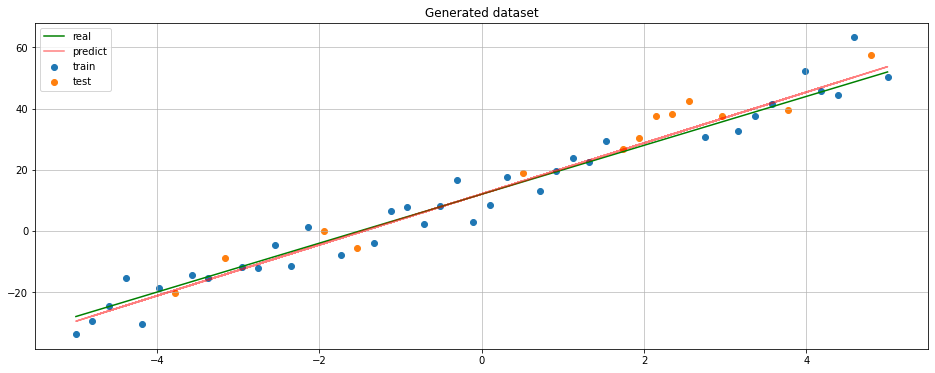

In [5]:
y_pred_train = clf.predict(X_train[:, np.newaxis])

plt.figure(figsize=(16, 6))
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, k * X + m, label='real', c='g')
plt.plot(X_train, y_pred_train, label='predict', c='r', alpha=.5)

plt.title('Generated dataset')
plt.grid(alpha=.8)
plt.legend()
plt.show()